# one player multiple data analysis and email

In [172]:
from matplotlib import pyplot as plt
import seaborn as sn
import yagmail
from firebase import firebase  #firebase data retrieving code #live
firebase = firebase.FirebaseApplication('https://hackalz.firebaseio.com/', None)
result = firebase.get('/data', None)
result # type(result)=dict, JSON formate
p = list(result.values())
#absprint(p)


# print(p)
player_names = list(result.keys())
# print(player_names)
#--------------------------------------------------------
player_ages = []
player_genders = []
player_genetics = []
player_edu = []
player_genderb=[]



#---------------------------------------------
scoresheet = []
indiv_scores = []
names = []
for i in p:
    data = list(i.values())
    
    #print(data[0])
    #print(data[0]["age"])
    age = data[0]["age"]
    if int(age) >=60:
        agescore = 36
    elif 40 <= int(age) < 60:
        agescore = 60
    else: 
        agescore = 90
    
    gender =  data[0]["gender"]
    
    if gender == "F" : 
        genderscore = 18
    else:
        genderscore = 30
    
    genetic =  data[0]["genetic"]
    
    if genetic == "Y":
        geneticscore = 0
    else: 
        geneticscore = 60
        
    edu =  data[0]["education"]
    if edu == "Less than High school":
        eduscore = 15
    elif edu == "High school":
        eduscore = 25
    else:
        eduscore = 35
        
    exe =  data[0]["exercise"]
    if exe == "Daily":
        exescore = 15
    elif exe == "Monthly":
        exescore = 25
    elif exe == "Weekly":
        exescore = 25
    else:
        exescore = 35
    
#print("------")
# print(agescore, genderscore, geneticscore , eduscore, exescore )
    personal_score = agescore +  genderscore +  geneticscore +  eduscore +  exescore 
    
    
    
        
    
        
    
    
        
    
    
    
    #-----------------------------------
    if len(data) > 12:
        scores = []
        #team size greater than 11
        attempts = int(len(data)/11)
        
        for j in range(attempts):
            score = 0
            for k in range(1,12):
                #print(int(data[k + (j*12)]["score"]))
                score+= data[k+j*12]["score"]
            scores.append(score + personal_score)
        indiv_scores.append(scores)
        names.append(data[0]["name"])
        #print(scores)
        
        
indiv_scores
print(names)    


#scoresheet


 

['arjun', 'kshitiz']


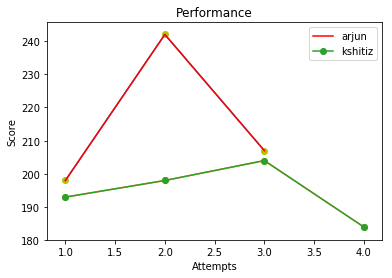

In [169]:
colours=['-r','-o','-b','-g']
for k in range(len(indiv_scores)):    
    attempts=[]
    for i in range(len(indiv_scores[k])):
        attempts.append(i+1)
   # print(attempts)
   # print(indiv_scores[k])
    f=plt.plot(attempts,indiv_scores[k])
    plt.xlabel('Attempts')
    plt.ylabel('Score')
    plt.title('Performance')
    plt.scatter(attempts,indiv_scores[k], c='y')
    plt.plot(attempts, indiv_scores[k], colours[k], label=names[k])
    plt.legend()

In [171]:
for i in range(len(indiv_scores)):
    if(max(indiv_scores[i])-min(indiv_scores[i])>43):
        print("Danger")
        yag = yagmail.SMTP('aegis.interns@gmail.com', 'interns_123').send('patnisanskaar@gmail.com', 'subject', 'please check with your neurologist')
    else:
        print("safe")
        yag = yagmail.SMTP('aegis.interns@gmail.com', 'interns_123').send('patnisanskaar@gmail.com', 'subject', 'no concern for now')

Danger
safe
